In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
figsize = (12, 6)

/home/dgq/.virtualenvs/jupyter3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/dgq/.virtualenvs/jupyter3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('dgq-glaptop3_2016-04-21-00:17-errors.csv', comment='#').dropna(how='all', axis=1)
names = df.pop('name')
splits = names.str.extract('<\d+>/(?P<Precision>\d+)/(?P<PartSize>[\w.]+)')
df = df.combine_first(splits)
df = df.set_index(['Precision', 'PartSize'])

/home/dgq/.virtualenvs/jupyter3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


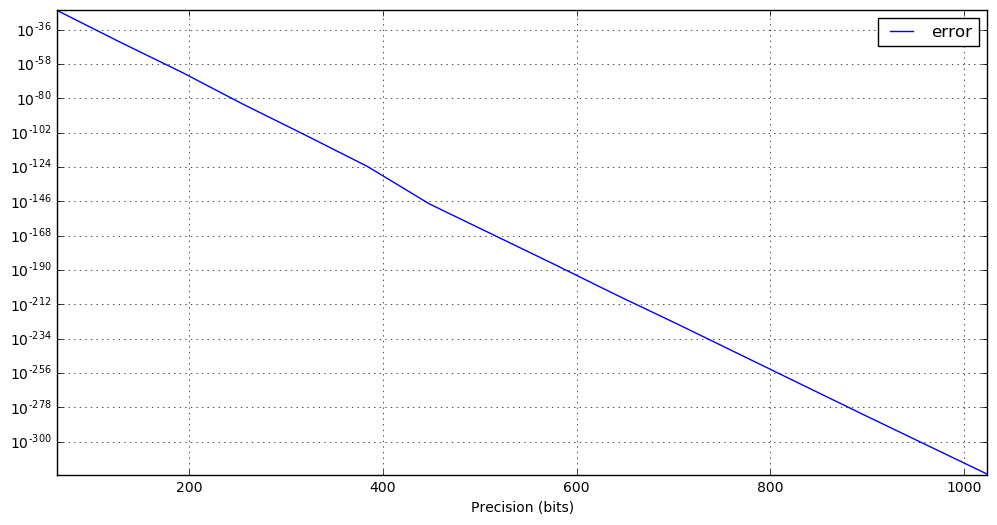

In [3]:
errors_by_precision_and_partsize = df[['label']]
errors_by_precision_and_partsize.columns = ['error']
ax = errors_by_precision_and_partsize.groupby(level=0).mean().plot(logy=True, grid=True, figsize=figsize)
ax.set_xlabel('Precision (bits)')

In [25]:
errors_by_precision_and_partsize.groupby(level=0).agg([np.mean])

error
                    mean
Precision               
64.0        1.960029e-24
128.0       1.939850e-44
192.0       7.877453e-64
256.0       1.491244e-84
320.0      3.015841e-104
384.0      2.540553e-124
448.0      2.448325e-148
512.0      1.475719e-167
576.0      8.967505e-187
640.0      2.150057e-206
704.0      2.558773e-225
768.0      1.105528e-244
832.0      5.063969e-264
896.0      2.323473e-283
960.0      1.749857e-302
1024.0     1.487138e-321

Precision
64.0      Axes(0.125,0.125;0.775x0.775)
128.0     Axes(0.125,0.125;0.775x0.775)
192.0     Axes(0.125,0.125;0.775x0.775)
256.0     Axes(0.125,0.125;0.775x0.775)
320.0     Axes(0.125,0.125;0.775x0.775)
384.0     Axes(0.125,0.125;0.775x0.775)
448.0     Axes(0.125,0.125;0.775x0.775)
512.0     Axes(0.125,0.125;0.775x0.775)
576.0     Axes(0.125,0.125;0.775x0.775)
640.0     Axes(0.125,0.125;0.775x0.775)
704.0     Axes(0.125,0.125;0.775x0.775)
768.0     Axes(0.125,0.125;0.775x0.775)
832.0     Axes(0.125,0.125;0.775x0.775)
896.0     Axes(0.125,0.125;0.775x0.775)
960.0     Axes(0.125,0.125;0.775x0.775)
1024.0    Axes(0.125,0.125;0.775x0.775)
dtype: object

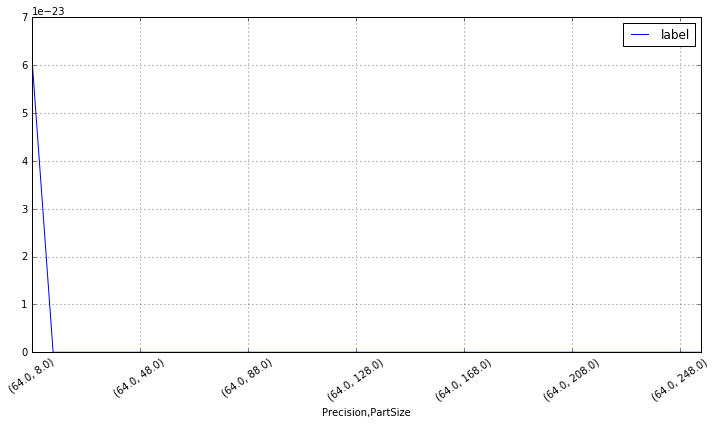

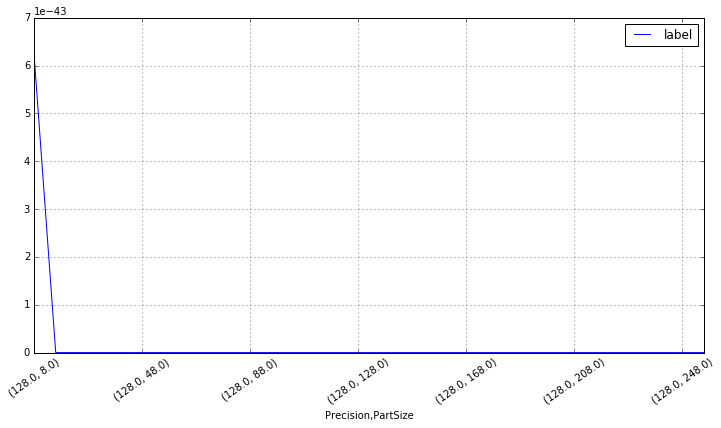

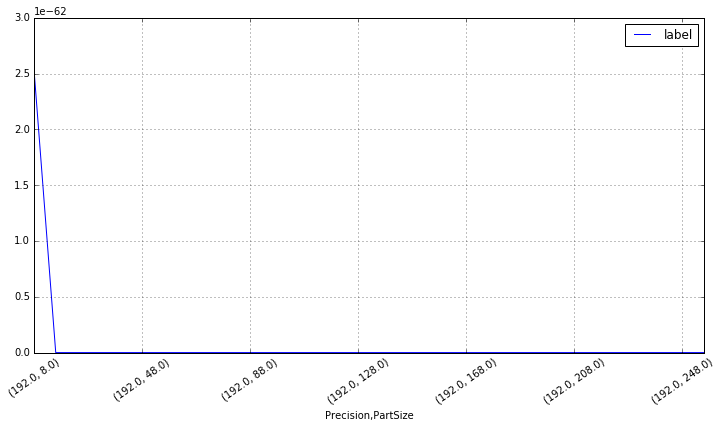

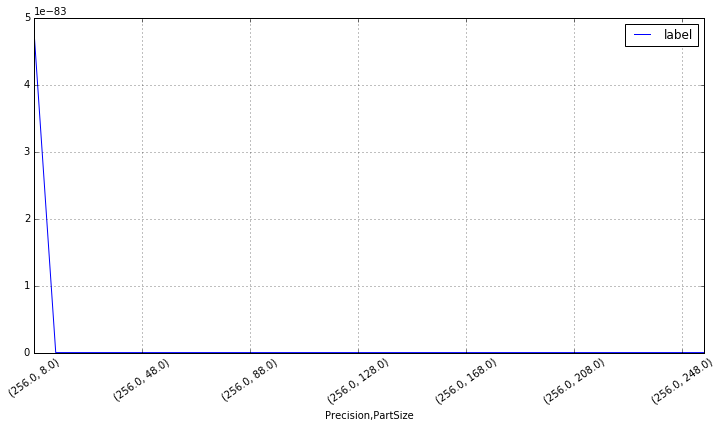

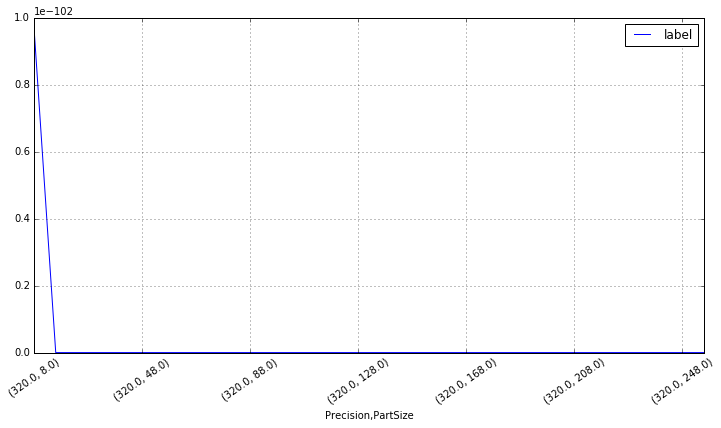

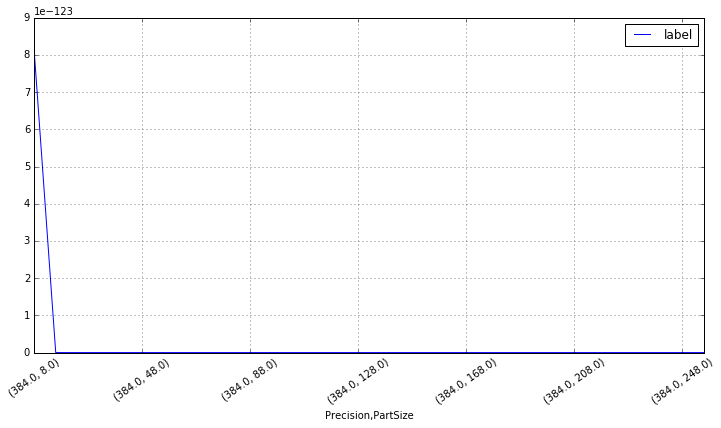

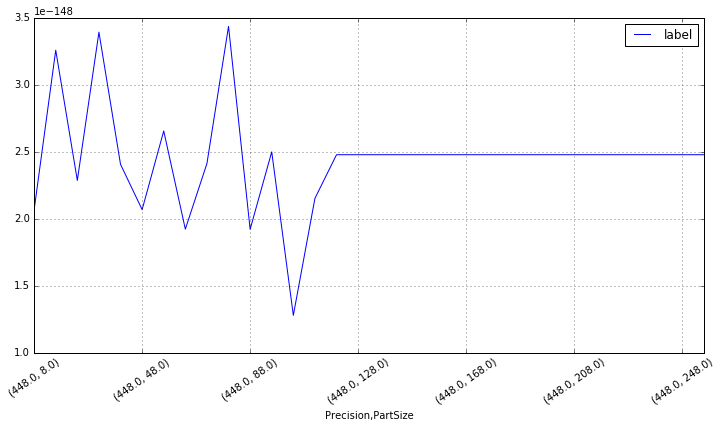

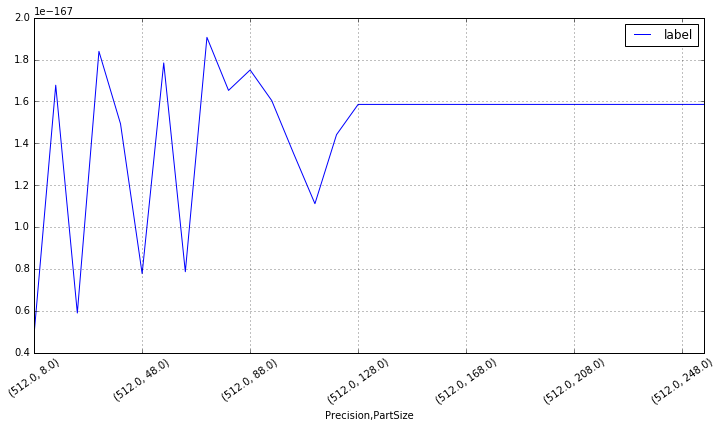

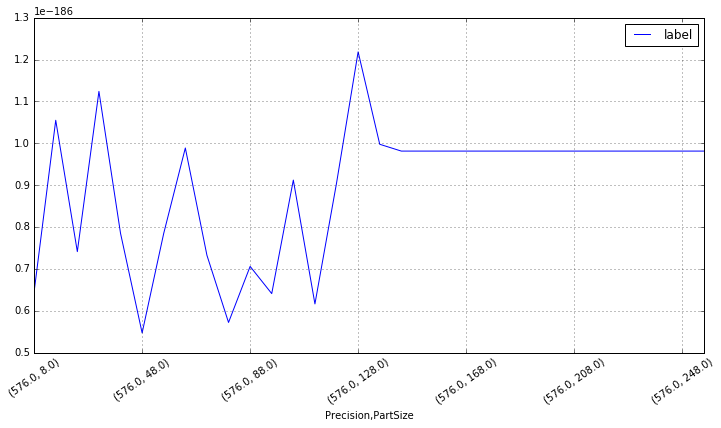

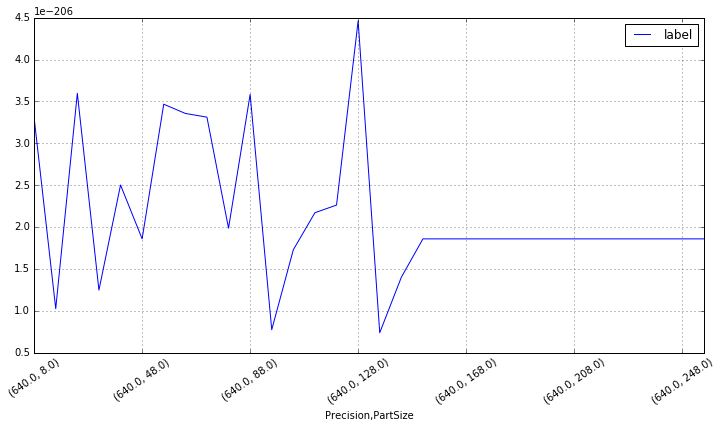

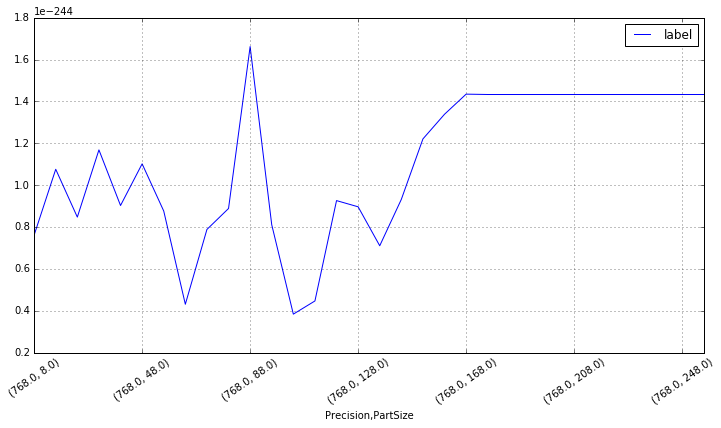

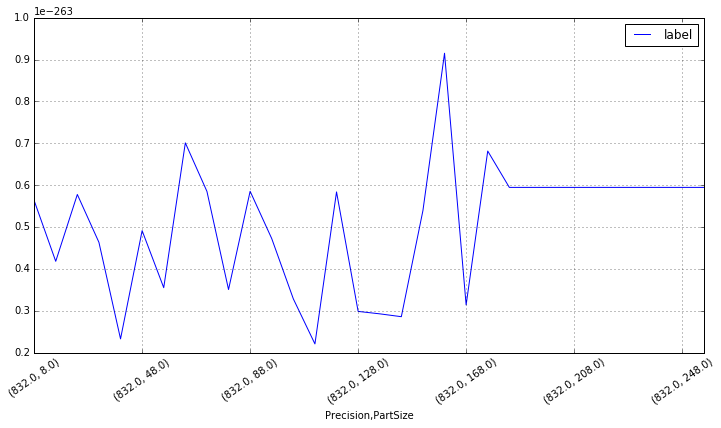

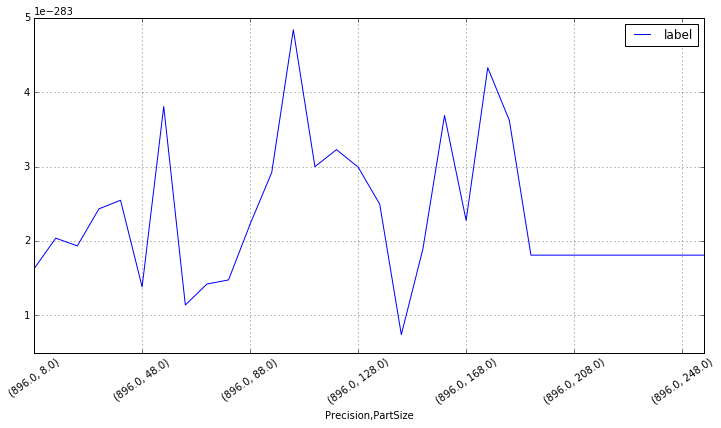

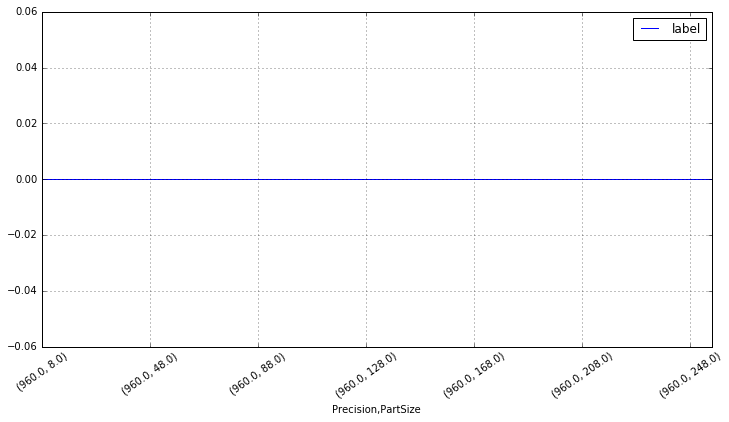

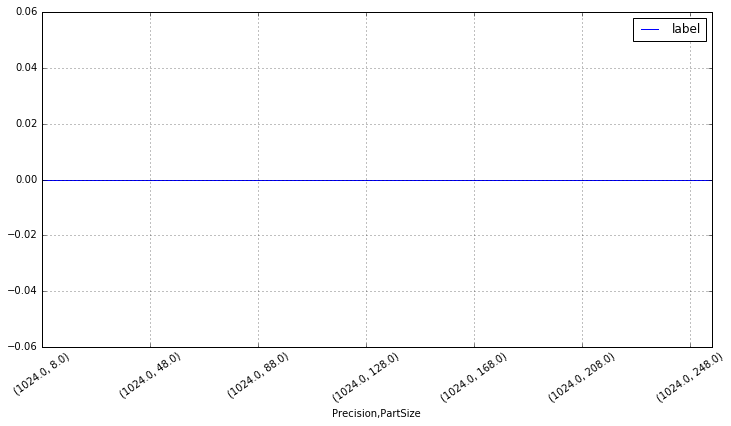

In [19]:
df[['label']].groupby(level=0).plot(rot=35, grid=True, figsize=figsize)